# Python kernel

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline
file="ABE_mageck_RRA_results.sgrna_summary_high_vs_d5"
df = pd.read_excel(file+".xls",index_col=0)
df.head()
import re
def get_chr(x):
    x=re.split(":|\.",x)[0]
    if not "chr" in x:
        if "HB" in x:
            return x
        else:
            return "control"
    return x
df['chr'] = df.Gene.apply(get_chr)
def assign_alpha(x):
    x=re.split(":|\.",x)[0]
    if not "chr" in x:
        if "HB" in x:
            return 1
        else:
            return 1
    return 0.4
df['alpha'] = df.Gene.apply(assign_alpha)
import numpy as np
df['control_mean'] = np.log2(df['control_mean']+1)
df['treat_mean'] = np.log2(df['treat_mean']+1)
df.to_csv(file+".csv")

# Switch to R kernel

In [5]:
install.packages("ggpubr",repos = "http://cran.us.r-project.org")


also installing the dependencies 'ggsignif', 'polynom'



package 'ggsignif' successfully unpacked and MD5 sums checked
package 'polynom' successfully unpacked and MD5 sums checked
package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yli11\AppData\Local\Temp\RtmpY7A01s\downloaded_packages


In [6]:
library(ggpubr)

Warning message:
"package 'ggpubr' was built under R version 3.5.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: magrittr


In [8]:
file="ABE_mageck_RRA_results.sgrna_summary_high_vs_d5"

In [14]:
df = read.csv(paste(file,".csv",sep=""))

Warning message:
"Removed 5 rows containing missing values (geom_point)."

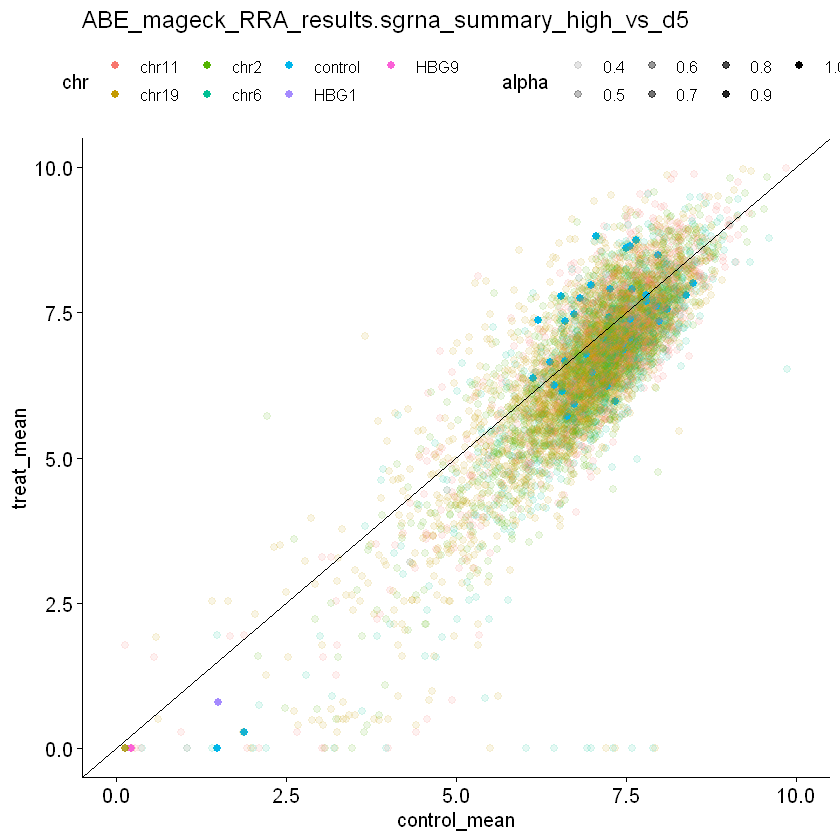

In [17]:
ggscatter(df,x='control_mean',y='treat_mean',color='chr',alpha='alpha' )+
geom_abline(intercept = 0, slope = 1, color="black",  size=0.5)+
xlim(0, 10)+
ylim(0, 10)+
ggtitle(file) 



In [18]:
ggsave(paste(file,".png",sep=""),dpi=300)

Saving 6.67 x 6.67 in image
Warning message:
"Removed 5 rows containing missing values (geom_point)."